In [8]:
import pandas_datareader as pdd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

In [9]:
tech_list= ['AAPL','MSFT','HALO','AMZN','GOOG']
end=datetime.now()
start= datetime(end.year-1,end.month,end.day)

In [13]:
for stock in tech_list:
    globals()[stock]=pdd.data.DataReader(stock,'yahoo',start,end)

In [15]:
AAPL

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-12-13,182.130005,175.529999,181.119995,175.740005,153237000.0,174.725922
2021-12-14,177.740005,172.210007,175.250000,174.330002,139380400.0,173.324066
2021-12-15,179.500000,172.309998,175.110001,179.300003,131063300.0,178.265396
2021-12-16,181.139999,170.750000,179.279999,172.259995,150185800.0,171.265991
2021-12-17,173.470001,169.690002,169.929993,171.139999,195432700.0,170.152466
...,...,...,...,...,...,...
2022-12-06,147.300003,141.919998,147.070007,142.910004,64727200.0,142.910004
2022-12-07,143.369995,140.000000,142.190002,140.940002,69721100.0,140.940002
2022-12-08,143.520004,141.100006,142.360001,142.649994,62128300.0,142.649994


In [16]:
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,252.000000,252.000000,252.000000,252.000000,2.520000e+02,252.000000
mean,159.148095,154.921786,157.000754,157.088452,8.891628e+07,156.580730
std,12.775973,12.987144,12.980935,12.870579,2.524959e+07,12.654395
min,132.389999,129.039993,130.070007,130.059998,3.519590e+07,129.664490
25%,148.075005,144.239994,145.817505,146.474998,7.152005e+07,146.131775
50%,158.580002,153.934998,156.555000,156.779999,8.447425e+07,156.078911
75%,170.549995,166.642498,168.764996,168.527504,9.821470e+07,167.925308
max,182.940002,179.119995,182.630005,182.009995,1.954327e+08,180.959747


<AxesSubplot:xlabel='Date'>

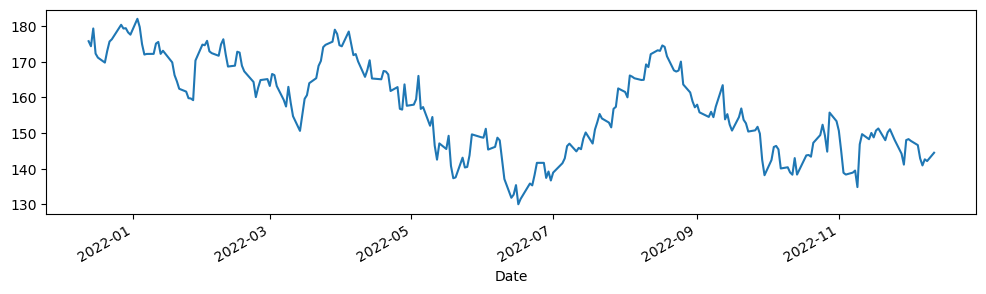

In [18]:
AAPL['Close'].plot(figsize=(12,3))

<AxesSubplot:xlabel='Date'>

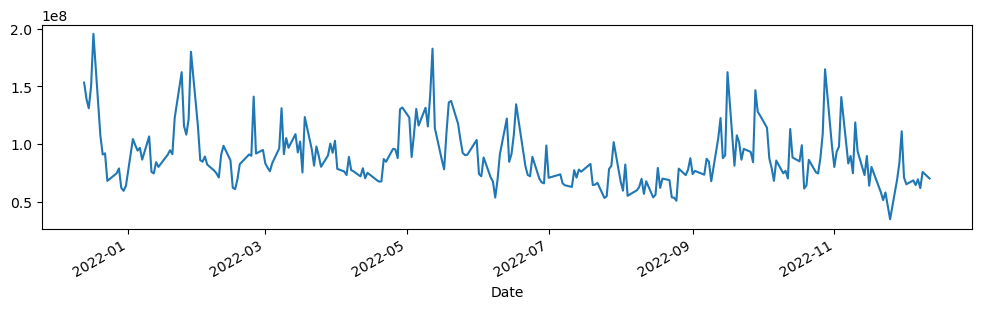

In [19]:
AAPL['Volume'].plot(figsize=(12,3))

In [21]:
ma_day=[10,20,50]
for ma in ma_day:
    column_name= "MA for %s days" % str(ma)
    AAPL[column_name]= AAPL['Close'].rolling(window=ma).mean()

In [24]:
AAPL

,High,Low,Open,Close,Volume,Adj Close,MA for 10 days,MA for 20 days,MA for 50 days
Date,,,,,,,,,
2021-12-13,182.130005,175.529999,181.119995,175.740005,153237000.0,174.725922,NaN,NaN,NaN
2021-12-14,177.740005,172.210007,175.250000,174.330002,139380400.0,173.324066,NaN,NaN,NaN
2021-12-15,179.500000,172.309998,175.110001,179.300003,131063300.0,178.265396,NaN,NaN,NaN
2021-12-16,181.139999,170.750000,179.279999,172.259995,150185800.0,171.265991,NaN,NaN,NaN
2021-12-17,173.470001,169.690002,169.929993,171.139999,195432700.0,170.152466,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2022-12-06,147.300003,141.919998,147.070007,142.910004,64727200.0,142.910004,146.844000,146.825498,145.518599
2022-12-07,143.369995,140.000000,142.190002,140.940002,69721100.0,140.940002,145.920001,146.897498,145.302199
2022-12-08,143.520004,141.100006,142.360001,142.649994,62128300.0,142.649994,145.078000,147.286498,145.158399


<AxesSubplot:xlabel='Date'>

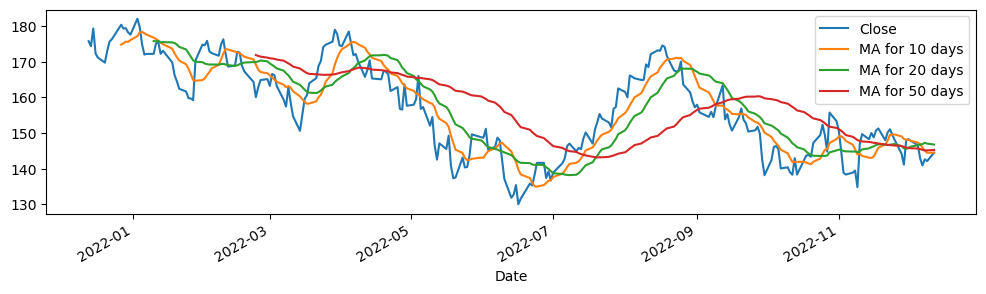

In [26]:
AAPL[['Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(figsize=(12,3))

In [28]:
AAPL['Daily Return']=AAPL['Close'].pct_change()

<AxesSubplot:xlabel='Date'>

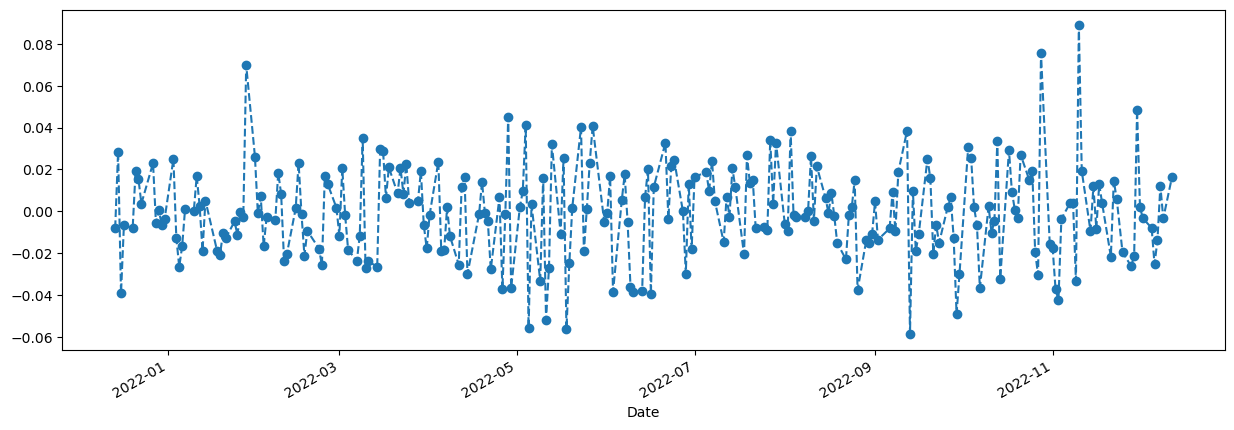

In [31]:
AAPL['Daily Return'].plot(figsize=(15,5),linestyle='--',marker='o')

C:\Users\amitb\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Daily Return', ylabel='Density'>

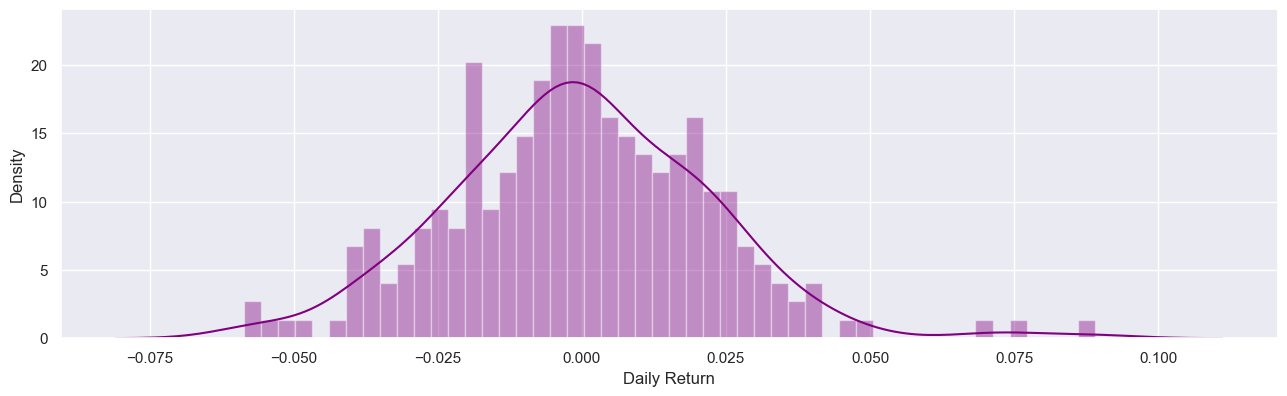

In [35]:
sns.set(rc={'figure.figsize':(15.7,4.27)})
sns.distplot(AAPL['Daily Return'],bins=50,color='purple')

In [48]:
closing_df=pdd.data.DataReader(tech_list,'yahoo',start,end)['Close']

In [49]:
closing_df

Symbols,AAPL,MSFT,HALO,AMZN,GOOG
Date,,,,,
2021-12-13,175.740005,339.399994,34.660000,169.567505,146.704498
2021-12-14,174.330002,328.339996,34.639999,169.091507,144.970505
2021-12-15,179.300003,334.649994,36.930000,173.315002,147.368500
2021-12-16,172.259995,324.899994,35.639999,168.871002,144.838501
2021-12-17,171.139999,323.799988,38.529999,170.017502,142.802994
...,...,...,...,...,...
2022-12-06,142.910004,245.119995,56.380001,88.250000,97.309998
2022-12-07,140.940002,244.369995,57.740002,88.459999,95.150002
2022-12-08,142.649994,247.399994,57.849998,90.349998,93.949997


In [50]:
tech_rets= closing_df.pct_change()
tech_rets.head()

Symbols,AAPL,MSFT,HALO,AMZN,GOOG
Date,,,,,
2021-12-13,NaN,NaN,NaN,NaN,NaN
2021-12-14,-0.008023,-0.032587,-0.000577,-0.002807,-0.011820
2021-12-15,0.028509,0.019218,0.066109,0.024978,0.016541
2021-12-16,-0.039264,-0.029135,-0.034931,-0.025641,-0.017168
2021-12-17,-0.006502,-0.003386,0.081089,0.006789,-0.014054


C:\Users\amitb\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


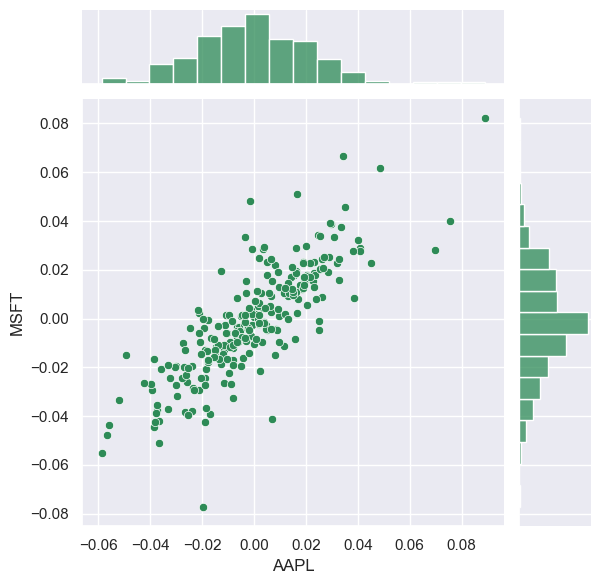

In [51]:
sns.jointplot('AAPL','MSFT',tech_rets,color='seagreen')

C:\Users\amitb\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


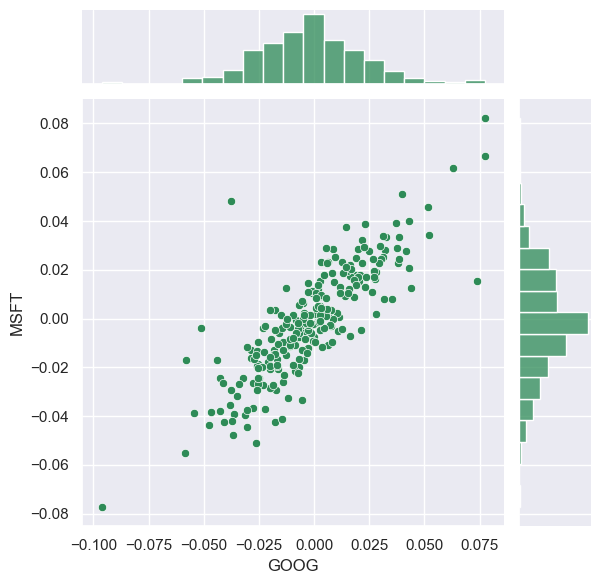

In [52]:
sns.jointplot('GOOG','MSFT',tech_rets,color='seagreen')

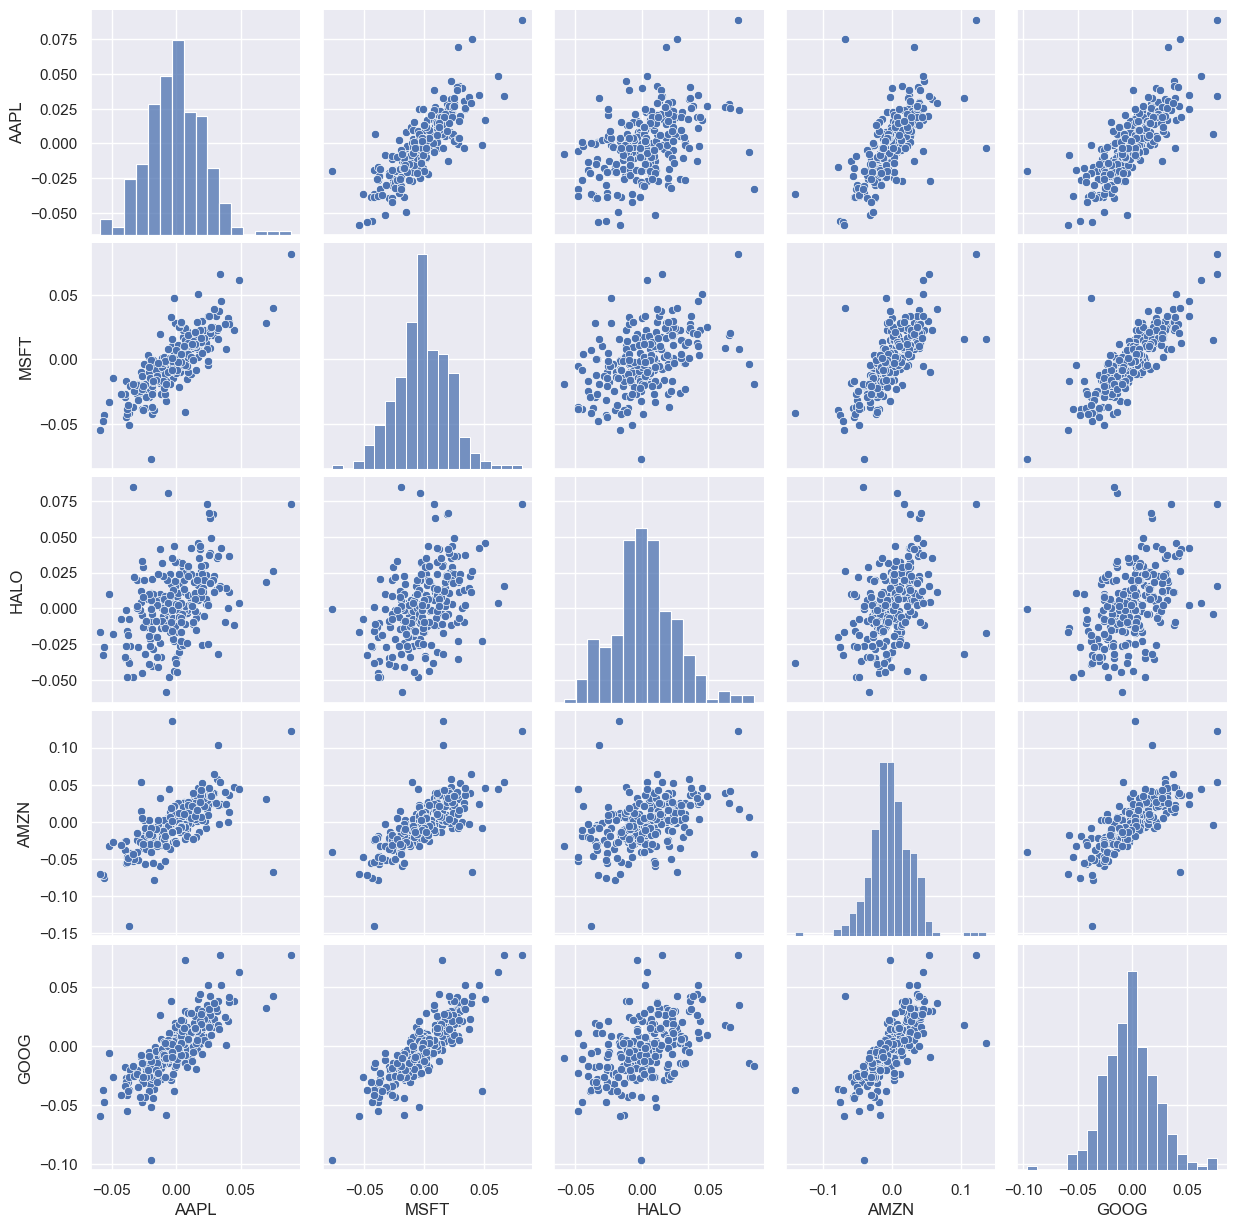

In [53]:
sns.pairplot(tech_rets)

C:\Users\amitb\anaconda3\lib\site-packages\seaborn\distributions.py:1210: UserWarning: The following kwargs were not used by contour: 'camp'
  cset = contour_func(
C:\Users\amitb\anaconda3\lib\site-packages\seaborn\distributions.py:1210: UserWarning: The following kwargs were not used by contour: 'camp'
  cset = contour_func(
C:\Users\amitb\anaconda3\lib\site-packages\seaborn\distributions.py:1210: UserWarning: The following kwargs were not used by contour: 'camp'
  cset = contour_func(
C:\Users\amitb\anaconda3\lib\site-packages\seaborn\distributions.py:1210: UserWarning: The following kwargs were not used by contour: 'camp'
  cset = contour_func(
C:\Users\amitb\anaconda3\lib\site-packages\seaborn\distributions.py:1210: UserWarning: The following kwargs were not used by contour: 'camp'
  cset = contour_func(
C:\Users\amitb\anaconda3\lib\site-packages\seaborn\distributions.py:1210: UserWarning: The following kwargs were not used by contour: 'camp'
  cset = contour_func(
C:\Users\amitb\a

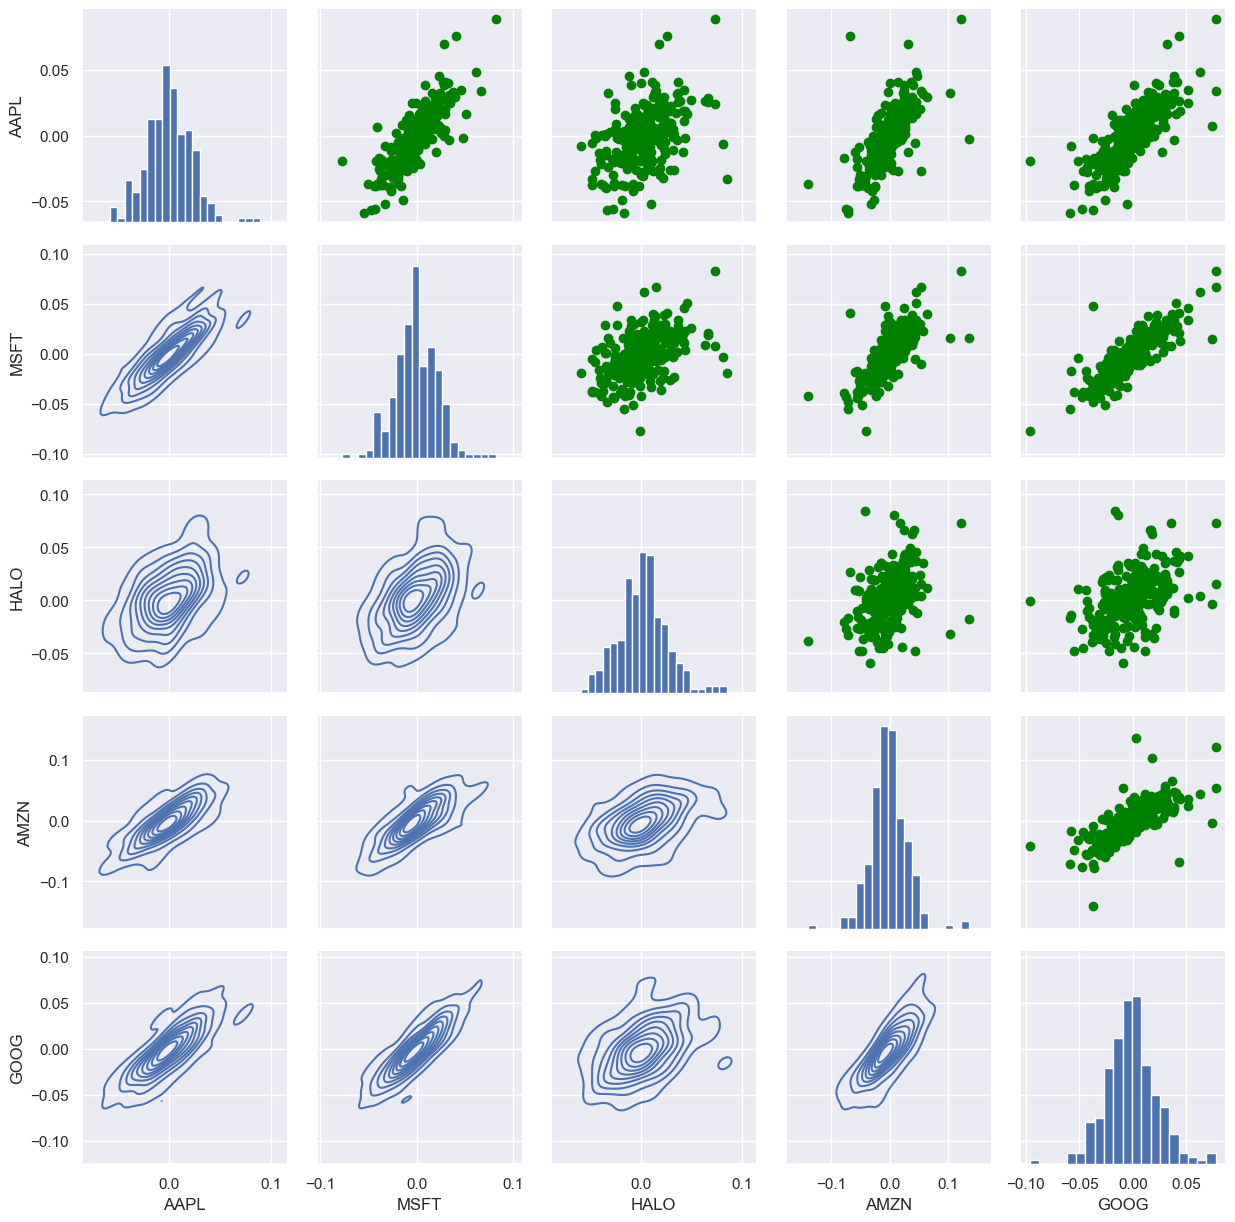

In [54]:
returns_fig= sns.PairGrid(tech_rets)
returns_fig.map_upper(plt.scatter,color='green')
returns_fig.map_lower(sns.kdeplot,camp='cool_d')
returns_fig.map_diag(plt.hist,bins=20)

C:\Users\amitb\anaconda3\lib\site-packages\seaborn\distributions.py:1210: UserWarning: The following kwargs were not used by contour: 'camp'
  cset = contour_func(
C:\Users\amitb\anaconda3\lib\site-packages\seaborn\distributions.py:1210: UserWarning: The following kwargs were not used by contour: 'camp'
  cset = contour_func(
C:\Users\amitb\anaconda3\lib\site-packages\seaborn\distributions.py:1210: UserWarning: The following kwargs were not used by contour: 'camp'
  cset = contour_func(
C:\Users\amitb\anaconda3\lib\site-packages\seaborn\distributions.py:1210: UserWarning: The following kwargs were not used by contour: 'camp'
  cset = contour_func(
C:\Users\amitb\anaconda3\lib\site-packages\seaborn\distributions.py:1210: UserWarning: The following kwargs were not used by contour: 'camp'
  cset = contour_func(
C:\Users\amitb\anaconda3\lib\site-packages\seaborn\distributions.py:1210: UserWarning: The following kwargs were not used by contour: 'camp'
  cset = contour_func(
C:\Users\amitb\a

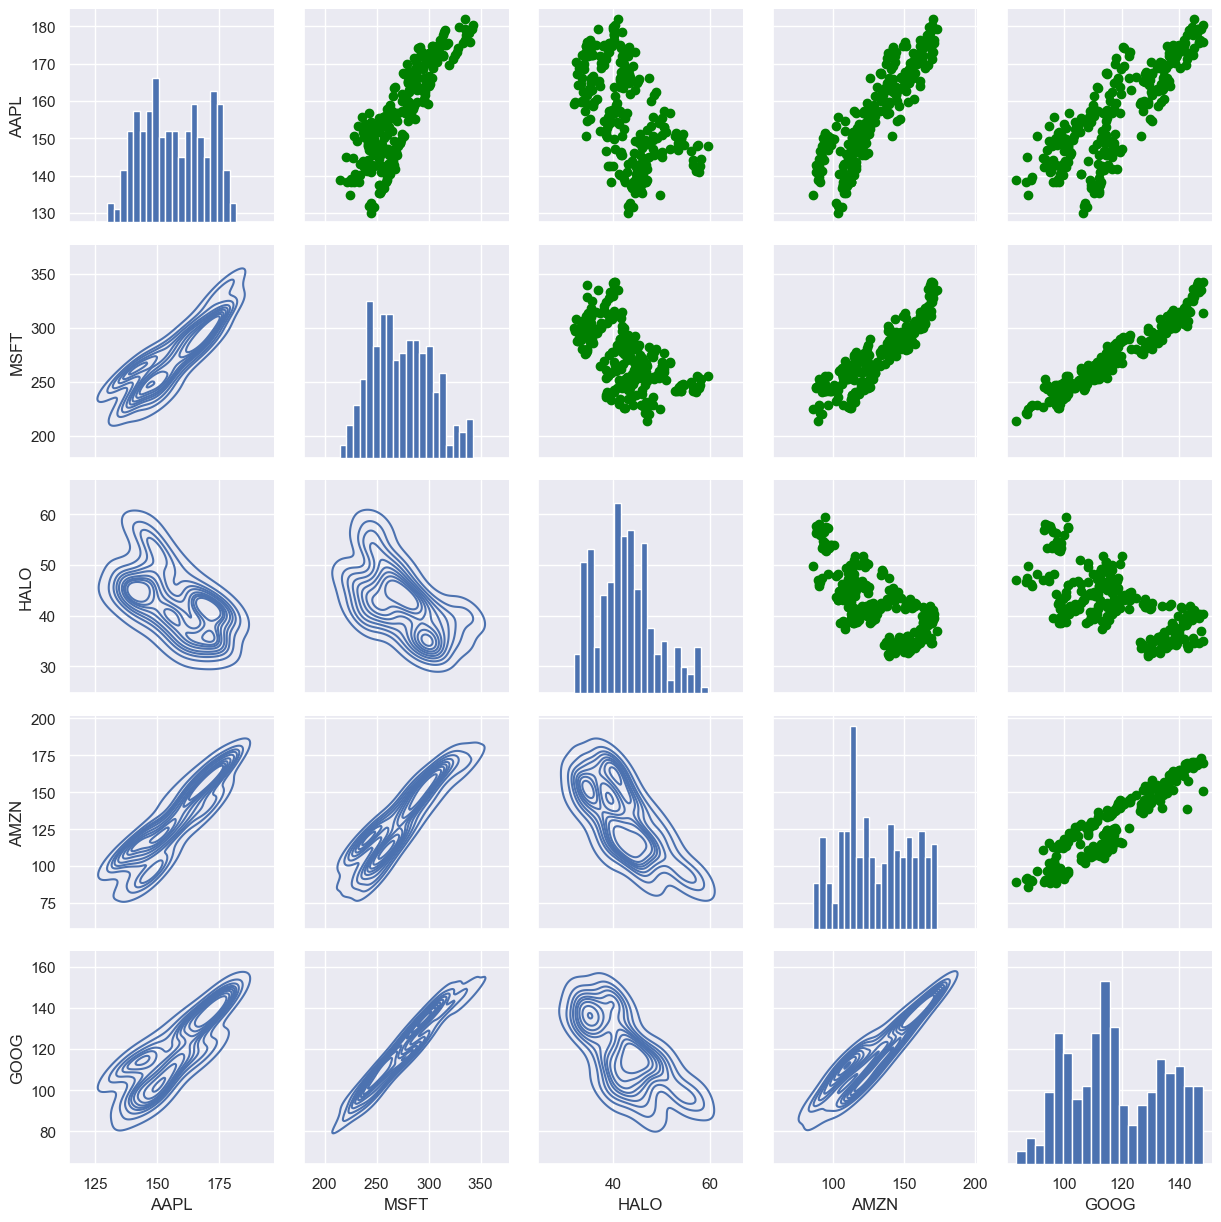

In [59]:
returns_fig= sns.PairGrid(closing_df)
returns_fig.map_upper(plt.scatter,color='green')
returns_fig.map_lower(sns.kdeplot,camp='cool_d')
returns_fig.map_diag(plt.hist,bins=20)

In [ ]:
## The lower the variance, the less I risk

In [61]:
rets= tech_rets.dropna()

In [62]:
len(rets)

251

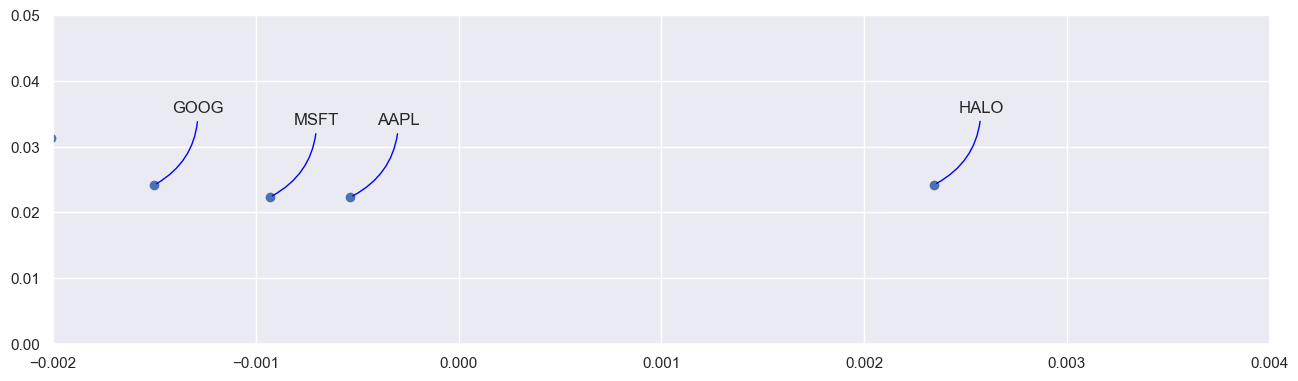

In [73]:
plt.scatter(rets.mean(),rets.std())
for label,x,y in zip(rets.columns,rets.mean(),rets.std()):
    plt.xlim([-0.002,0.004])
    plt.ylim([0.0,0.05])
    plt.annotate(
        label,
        xy=(x,y),
        xytext=(50,50),
        textcoords='offset points',ha='right',va='bottom',
    arrowprops=dict(arrowstyle='-',edgecolor='blue',connectionstyle='arc3,rad=-0.3'))
